
---

## 📌 หัวข้อการบ้าน: การสร้างไอเดียผลิตภัณฑ์ใหม่ด้วย AI Image Generation และ Editing


---

### 🧠 คำอธิบายโจทย์

คุณได้รับมอบหมายให้เป็นนักออกแบบผลิตภัณฑ์ และนักสร้างสื่อโฆษณา โดยใช้ **OpenAI Image Generation และ Editing ** เพื่อสร้างไอเดียผลิตภัณฑ์ใหม่จาก **text prompt** และนำภาพเหล่านั้นไป **ตกแต่ง ปรับแก้** และสร้างเป็น **สื่อประชาสัมพันธ์** (ad content)

---

### ✅ สิ่งที่ต้องทำ (Tasks)

1. **สร้าง Prompt** อย่างน้อย 3 ชุด สำหรับการสร้างภาพผลิตภัณฑ์ใหม่ (เช่น น้ำหอม, ของขวัญ, เครื่องเขียน, อุปกรณ์ไอที ฯลฯ)
2. **เรียกใช้ OpenAI Image Generation API** เพื่อสร้างภาพตาม prompt
3. **นำภาพเหล่านั้นมาแก้ไข** ด้วย OpenAI Image Editing API (สามารถใส่ข้อความ, เปลี่ยนสีพื้นหลัง, เพิ่มโลโก้ หรือวัตถุเพิ่มเติม)
4. **ออกแบบสื่อโฆษณา (Ad Poster)** โดยนำภาพที่ได้มาตกแต่งประกอบกับข้อความสั้นๆ เช่น คำโปรย, โลโก้, ชื่อแบรนด์ ฯลฯ
5. **จัดทำเนื้อหา (content)** ที่อธิบายผลิตภัณฑ์นั้น เช่น คุณสมบัติ, ประโยชน์, ราคาแนะนำ
6. **รวมทั้งหมดลงใน Jupyter Notebook** โดยอธิบายแต่ละขั้นตอน พร้อมแสดงรูปภาพและโค้ดที่ใช้

---

### 🧪 ข้อเสนอแนะในการใช้เทคนิค

* ใช้ `base64` ในการ encode รูปภาพ
* ใช้ `matplotlib.pyplot` เพื่อแสดงภาพใน notebook

---

### 📦 สิ่งที่ต้องส่ง

* ไฟล์ Jupyter Notebook `.ipynb` ที่มี:

  * โค้ดที่ทำงานได้
  * คำอธิบายทุกขั้นตอน
  * Prompt ที่ใช้
  * ภาพต้นฉบับ และภาพที่ถูกแก้ไข
  * ภาพสื่อโฆษณาสุดท้าย
  * คำอธิบายผลิตภัณฑ์

---

### 🌟 ตัวอย่างไอเดียผลิตภัณฑ์ 

* เทียนหอมกลิ่นผลไม้ดีไซน์ไทย
* ชุดของขวัญสปาสำหรับแมวดีไซน์ไทย
* กล่องใส่ของเล่นเด็กอัจฉริยะ
* ปากกา AI ที่สามารถแปลภาษาได้
* กระเป๋าแฟชั่นวัสดุรีไซเคิล

---

### 💡 เกณฑ์การให้คะแนน (รวม 10 คะแนน)

| รายการ                          | คะแนน |
| ------------------------------- | ----- |
| ความคิดสร้างสรรค์ของผลิตภัณฑ์   | 2     |
| ความถูกต้องของการใช้ API        | 2     |
| การใช้ Prompt และการแก้ไขภาพ    | 2     |
| ความสวยงามของสื่อโฆษณา          | 2     |
| ความสมบูรณ์ของ Jupyter Notebook | 2     |

---



In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio
!pip install matplotlib

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

## Prompt ที่ใช้เจนภาพผลิตภัณฑ์

In [ ]:
# Define your 3 prompts
prompts = [
    "A high-quality image of an AI-powered spice maker in action, with colorful spices being mixed by the device into a bowl. The machine is sleek, with a user-friendly interface. The countertop is surrounded by fresh vegetables, herbs, and a tablet showing a recipe, creating an atmosphere where cooking is easy and fun with the AI spice maker.",
    "A charismatic food influencer woman in their early 30s, with a passion for cooking and she is smiling",
    "A beautifully plated dish, showing a vibrant chicken salad with a perfect blend of spices, garnished with fresh herbs,"
]

### โค๊ดนี้คือการทำ for loop สำหรับการเจนภาพผลิตภัณฑ์ พรีเซนเตอร์และสถานที่

In [ ]:
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Initialize OpenAI client with API key
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))


# Store generated images
images = []

# Generate and decode images for each prompt
for prompt in prompts:
    response = openai_client.images.generate(
        model="gpt-image-1",  # Use "gpt-image-1" for current image model
        prompt=prompt,
        size="1024x1024",
        quality="high",  # Options: "low", "medium", "high", or "auto"
        n=1
    )
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_bytes))
    images.append(image)



### การแสดงผลภาพมาให้ดูใน ipynb

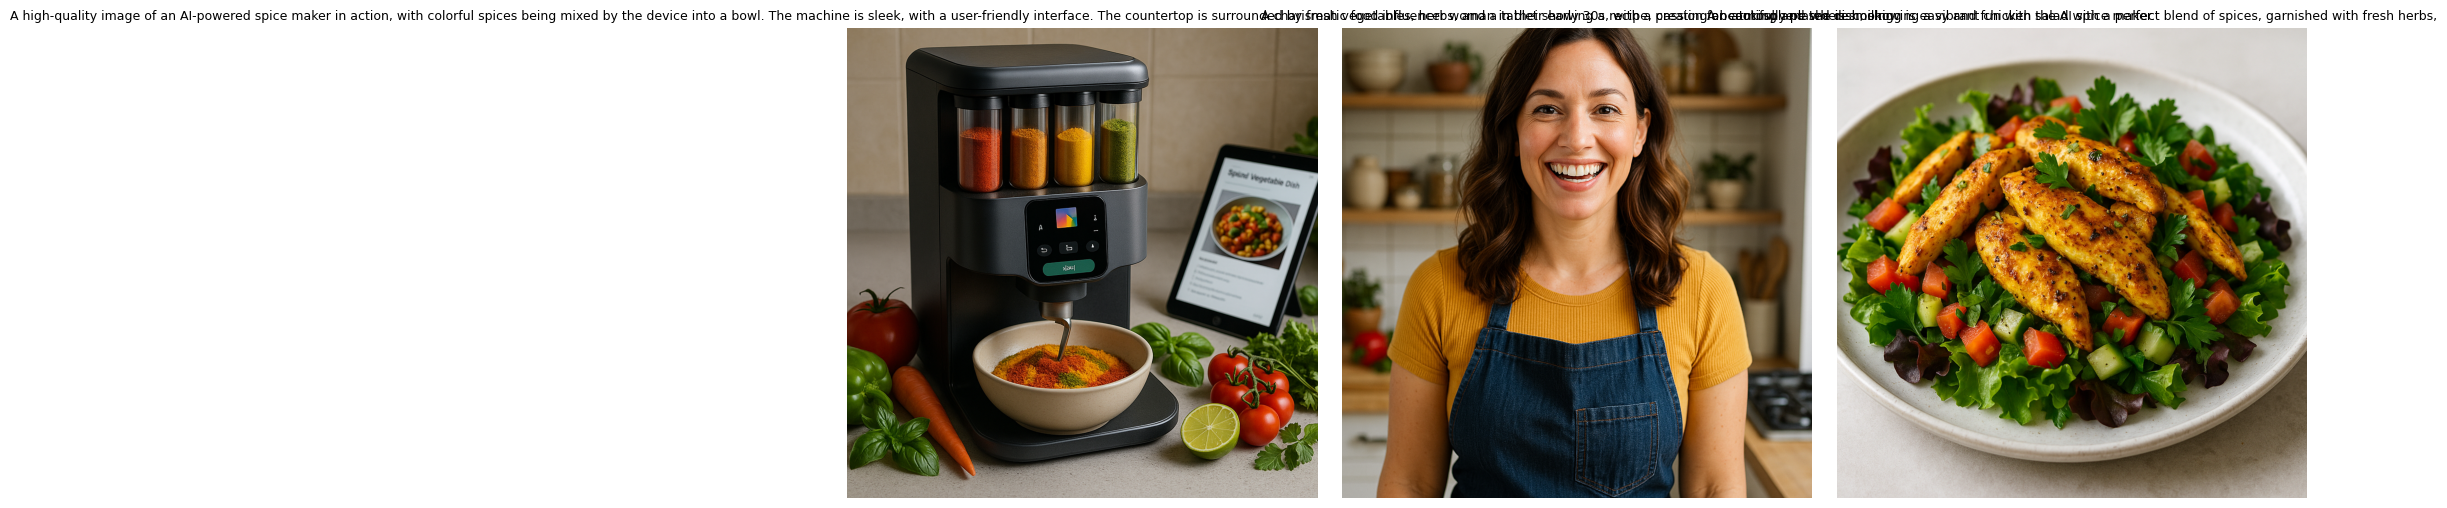

In [4]:
# Display images with matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img, title in zip(axes, images, prompts):
    ax.imshow(img)
    ax.set_title(title, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Prompt สำหรับการทำโฆษณาและทำการรวมภาพทุกอย่างเข้าด้วยกัน


In [ ]:
prompt_ad  = """Generate an image of a kitchen room, containing all the items in the reference pictures. 
Include the text Create the perfect flavor in every dish in the top right corner of the image with a clean and modern font, Below the image, display the brand name "SpiceMaker" in an elegant, professional logo with a deep blue background and golden text, giving it a sleek and premium look. The design should focus on creating an inviting atmosphere and showcase the convenience and innovation of the SpiceMaker appliance..
,
"""

### โค๊ดนี้คือการเจนภาพโดยนำแต่ละองค์ประกอบมารวมเข้าด้วยกันและสร้างขึ้นเป็นภาพใหม่

In [ ]:
# Convert images to base64 for API input
def encode_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')
# Convert all images to base64
base64_images = [encode_image_to_base64(img) for img in images]

# Send images as input to OpenAI API
response = openai_client.responses.create(
    model="gpt-4.1",  # Using "gpt-4.1" model as per your example
    input=[
        {
            "role": "user",
            "content": [
                {"type": "input_text", "text": prompt_ad},
                {"type": "input_image", "image_url": f"data:image/jpeg;base64,{base64_images[0]}"},
                {"type": "input_image", "image_url": f"data:image/jpeg;base64,{base64_images[1]}"},
                {"type": "input_image", "image_url": f"data:image/jpeg;base64,{base64_images[2]}"}
            ],
        }
    ],
    tools=[{"type": "image_generation"}],
)

# Extract and save the generated image
image_generation_calls = [
    output for output in response.output if output.type == "image_generation_call"
]

image_data = [output.result for output in image_generation_calls]

if image_data:
    image_base64 = image_data[0]
    # Save the image to a file
    with open("gift-basket.png", "wb") as f:
        f.write(base64.b64decode(image_base64)) 
else:
    print(response.output.content)

### การแสดงผลภาพมาให้ดูใน ipynb

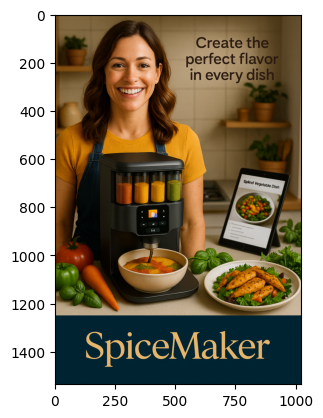

In [20]:
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)     

# เนื้อหาผลิตภัณฑ์

## AI Spice Maker – เครื่องปรุงรสอัจฉริยะที่ช่วยให้การทำอาหารเป็นเรื่องง่ายและสนุก

### คุณสมบัติของผลิตภัณฑ์:

การผสมเครื่องปรุงอัตโนมัติ: AI Spice Maker สามารถผสมเครื่องปรุงต่าง ๆ ได้อย่างแม่นยำตามสูตรที่ผู้ใช้เลือก โดยใช้เทคโนโลยี AI คำนวณรสชาติที่เหมาะสมที่สุดสำหรับทุกเมนู

คำนวณรสชาติด้วย AI: ไม่ต้องกังวลเรื่องการผสมเครื่องเทศหรือการปรับรสชาติอีกต่อไป! AI ช่วยให้คุณได้รสชาติที่เหมาะสมที่สุดทุกครั้งที่ทำอาหาร

รองรับสูตรต่าง ๆ: คุณสามารถเลือกสูตรอาหารที่ต้องการจากแอปพลิเคชัน และเครื่องจะทำการผสมเครื่องปรุงที่คุณต้องการในปริมาณที่เหมาะสม

การควบคุมผ่านแอป: ใช้งานง่ายผ่านแอปพลิเคชันที่เชื่อมต่อกับเครื่อง สามารถเลือกสูตรและคำนวณปริมาณเครื่องปรุงได้ทุกเมื่อ

ดีไซน์ทันสมัย: เครื่องมีการออกแบบที่สวยงามและทันสมัย เหมาะกับทุกครัวเรือน

### ประโยชน์ของผลิตภัณฑ์:

ง่ายและสะดวก: สำหรับคนที่รักการทำอาหารแต่ไม่มั่นใจเรื่องการผสมเครื่องปรุงหรือการปรับรสชาติ เครื่องนี้จะช่วยให้การทำอาหารเป็นเรื่องง่ายขึ้น

ความแม่นยำในการผสม: เครื่องปรุงรสนี้จะช่วยให้คุณได้รสชาติที่สมบูรณ์แบบทุกครั้งไม่ว่าจะเป็นการทำอาหารมื้อไหน

เหมาะสำหรับทุกคน: ไม่ว่าจะเป็นผู้เริ่มต้นทำอาหาร หรือเชฟมืออาชีพ ก็สามารถใช้งาน AI Spice Maker ได้อย่างสะดวก

เพิ่มความสนุกในการทำอาหาร: เครื่องนี้ทำให้การทำอาหารเป็นกิจกรรมที่สนุกและไม่ยุ่งยากอีกต่อไป

### ราคาผลิตภัณฑ์:
ราคาเริ่มต้น: 6,990 บาท (ราคาอาจแตกต่างตามโปรโมชั่นและตัวเลือก)

โปรโมชั่นพิเศษ: รับส่วนลด 10% เมื่อซื้อผ่านเว็บไซต์หรือแอปพลิเคชันภายในเดือนนี้